# Decision Tree

## Content

- Decision Trees
    - Scaling
    - Overfitting
    - Instability
    - HP tuning

- Oblivious Decision Tree
   
- Blending

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

# Preparation

## Read data

In [ ]:
df = pd.read_csv(r'C:\Users\310\Desktop\Progects_Py\ML-course-at-ICEF\data\german_credit_data_test.csv ')

print(df.shape)
df.head()

(100, 10)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,43,male,2,rent,little,little,2625,16,car,Unknown
1,44,male,2,own,NaN,NaN,3485,20,car,Unknown
2,42,male,2,free,NaN,NaN,10477,36,car,Unknown
3,40,male,2,rent,NaN,NaN,1386,15,radio/TV,Unknown
4,36,male,3,own,little,NaN,1278,24,radio/TV,Unknown


## Data preprocessing

In [6]:
num = ['Age', 'Credit amount', 'Duration']
cat = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
target = 'Risk'

In [7]:
df[target] = df[target].map({'good': 0, 'bad': 1})

df['Saving accounts'] = df['Saving accounts'].fillna('Unknown')
df['Checking account'] = df['Checking account'].fillna('Unknown')
df = pd.get_dummies(data=df, columns=cat, drop_first=True)

In [8]:
train_cols = df.columns.difference([target])

X = df[train_cols]
y = df[target]

In [9]:
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
cv = StratifiedKFold(n_splits=5)

# Decision Tree Classifier


A Decision tree is a flowchart like a tree structure, where each internal node denotes a test on an attribute (a condition), each branch represents an outcome of the test (True or False), and each leaf node (terminal node) holds a class label. Based on this tree, splits are made to differentiate classes in the original dataset given. The classifier predicts which of the classes a new data point belongs to based on the decision tree. The prediction boundaries are horizontal and vertical lines. Below is the data distribution and its corresponding decision tree.

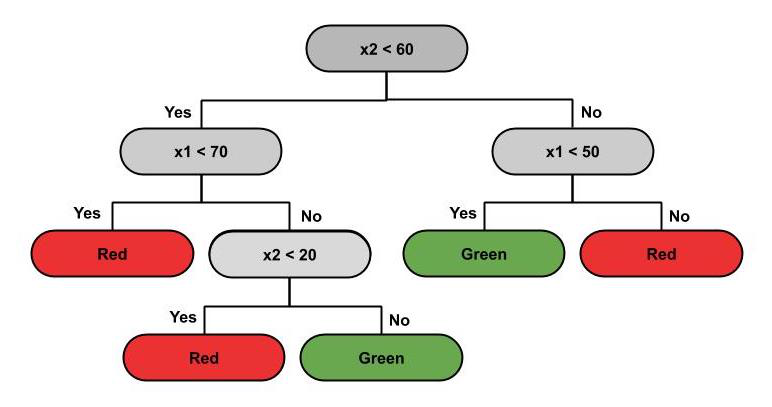


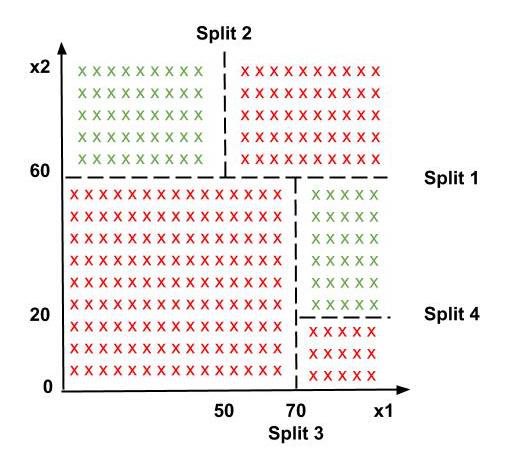


Pros:
- Interpretability
- no need for feature scaling
- works on both linear / non – linear problems.

Cons:
- Poor results on very small datasets
- overfitting can easily occur

Hyperparameters:
- criterion -- gini or entropy
- max_depth
- min_samples_split, min_samples_leaf, ... -- a lot of them to restrict tree building


#### Task: Fit Decision tree with and without scaled data. Compare the results.

In [11]:
random_state = 42

In [12]:
from sklearn.tree import DecisionTreeClassifier

...

Ellipsis

In [13]:
score = ...

print('ROC AUC {:.3f}'.format(score))

TypeError: unsupported format string passed to ellipsis.__format__

### Data rescaling


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_scaled = ...
X_val_scaled = ...

In [ ]:
...

DecisionTreeClassifier(random_state=42)

In [ ]:
score = ...

print('ROC AUC {:.3f}'.format(score))

ROC AUC 0.696


## Decison Tree tends to overfitting

For any consistent training sample, it is possible to build a decision tree that has zero error on this sample. If we consider objects as points in the feature space, then each of these points can be limited to an n-dimensional cube that will not contain other points. n-dimensional cube can be perfectly defined by a tree.

However, in this case, we obviously have overfitting.

So, how do we define early stopping criteria?

In [ ]:
Xtr.head()

,Age,Checking account_little,Checking account_moderate,Checking account_rich,Credit amount,Duration,Housing_own,Housing_rent,Job_1,Job_2,...,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Sex_male
76,34,1,0,0,3965,42,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
48,39,0,0,0,7228,11,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
664,50,0,0,1,1047,6,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
263,57,0,0,0,2748,12,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
727,25,1,0,0,1882,18,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
data_x = X_scaled[:, (0,5)]
data_y = ytr.values

In [ ]:
data_x

array([[-0.15278072,  1.78901329],
       [ 0.2686372 , -0.77140218],
       [ 1.19575661, -1.18437242],
       ...,
       [ 2.37572677, -0.93659028],
       [-0.40563147, -0.19324385],
       [-0.40563147,  1.29344901]])

#### Task: plot 2 numerical features of the dataset and color them with respect to their target value

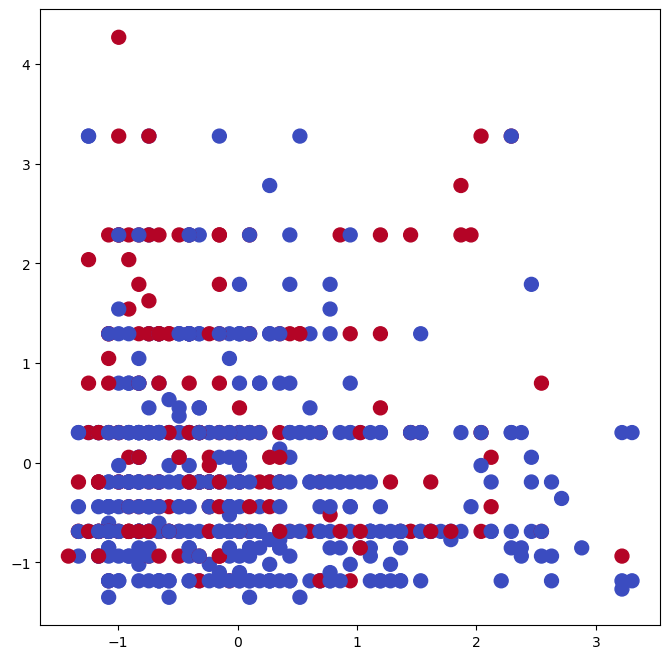

In [ ]:
np.random.seed(42)

plt.figure(figsize=(8, 8))

...

plt.show()

#### Task: fit DT on selected numerical features and predict it on all feature space of these 2 features
`Hint`: use get_grid() function

In [ ]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(...)

xx, yy = ...

predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
predicted = predicted.reshape(xx.shape)

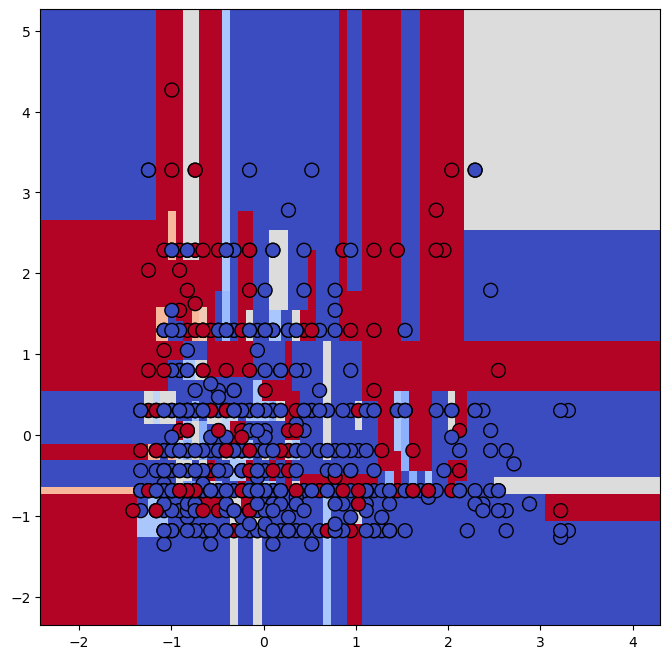

In [ ]:
plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='coolwarm', edgecolor='k')
plt.show();

Let's see how classification rules will look like depending on
- the minimum number of objects in leaf
- maximum tree depth

#### Task: fit DT on selected numerical features and predict it on all feature space of these 2 features

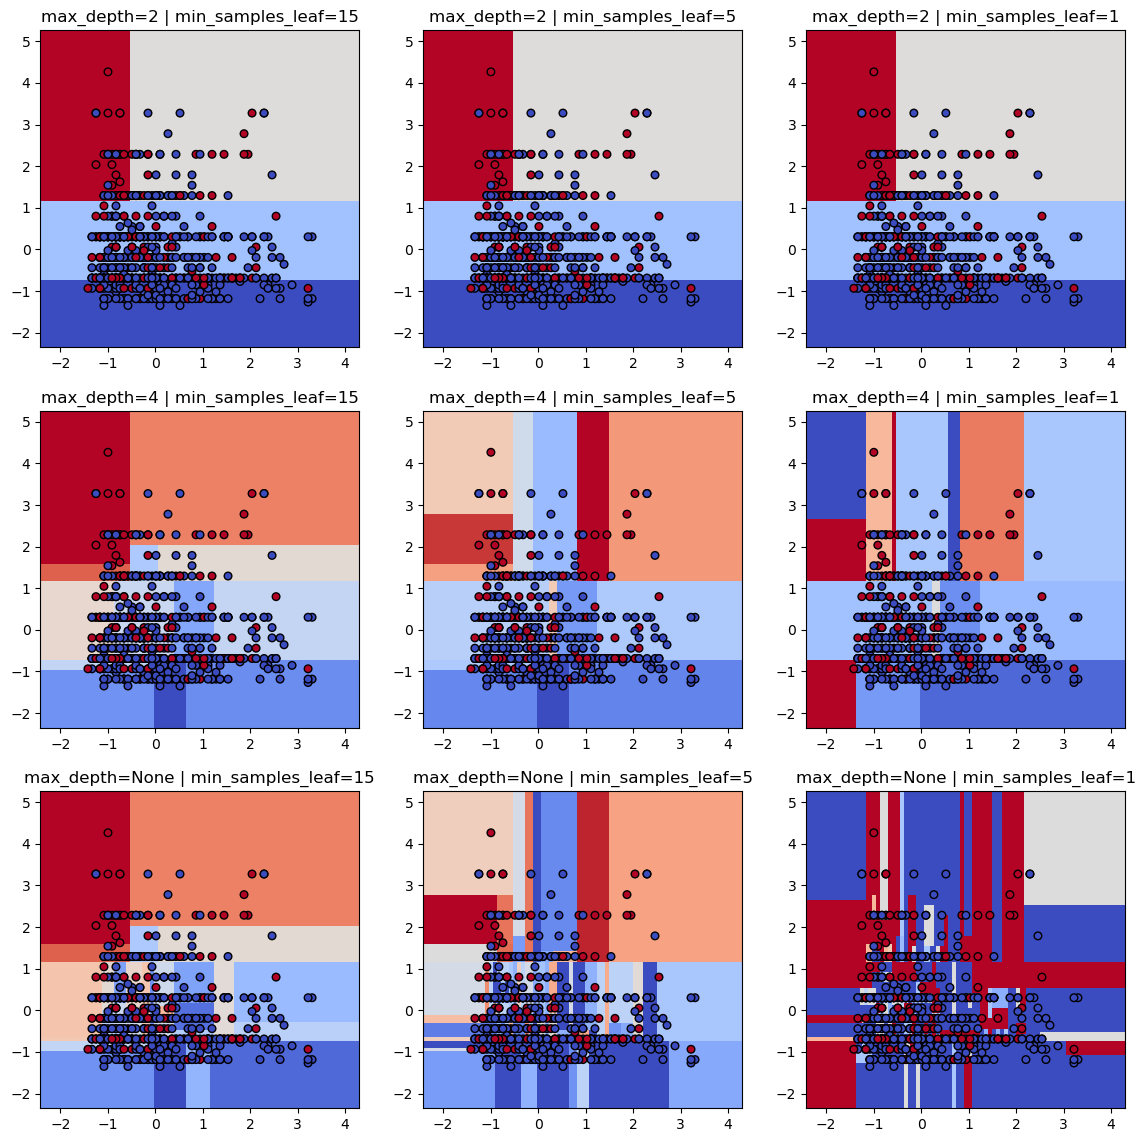

In [ ]:
plt.figure(figsize=(14, 14))
for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(...)
        xx, yy = ...
        
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        predicted = predicted.reshape(xx.shape)
        
        plt.subplot2grid((3, 3), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
        plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='coolwarm', edgecolor='k')
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))

Increasing the maximum depth and/or reducing the minimum number of samples in the leaf leads to an improvement  in quality and overfitting.

#### Task: do the same exercise with regression problem using generated random data
Vary min_samples_split, max_features. How do these parameters affect overfitting?

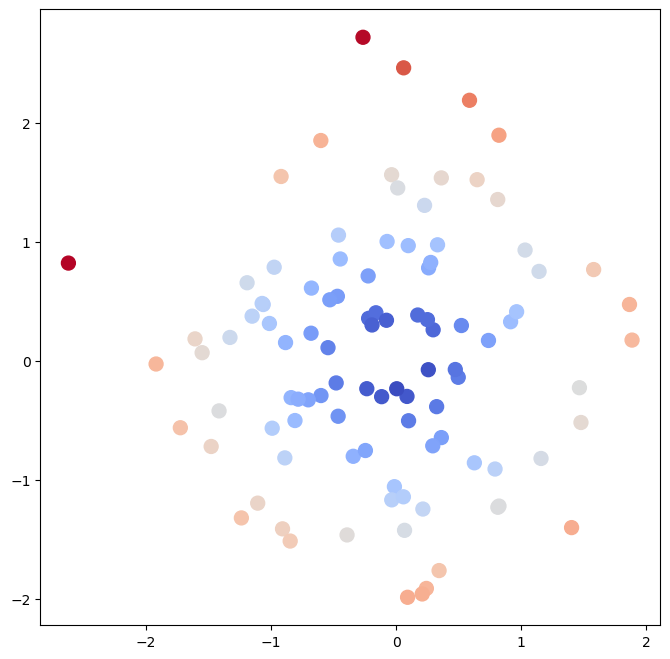

In [ ]:
np.random.seed(42)
data_x = np.random.normal(size=(100, 2))
data_y = (data_x[:, 0] ** 2 + data_x[:, 1] ** 2) ** 0.5 

plt.figure(figsize=(8, 8))
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='coolwarm')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DecisionTreeRegressor()

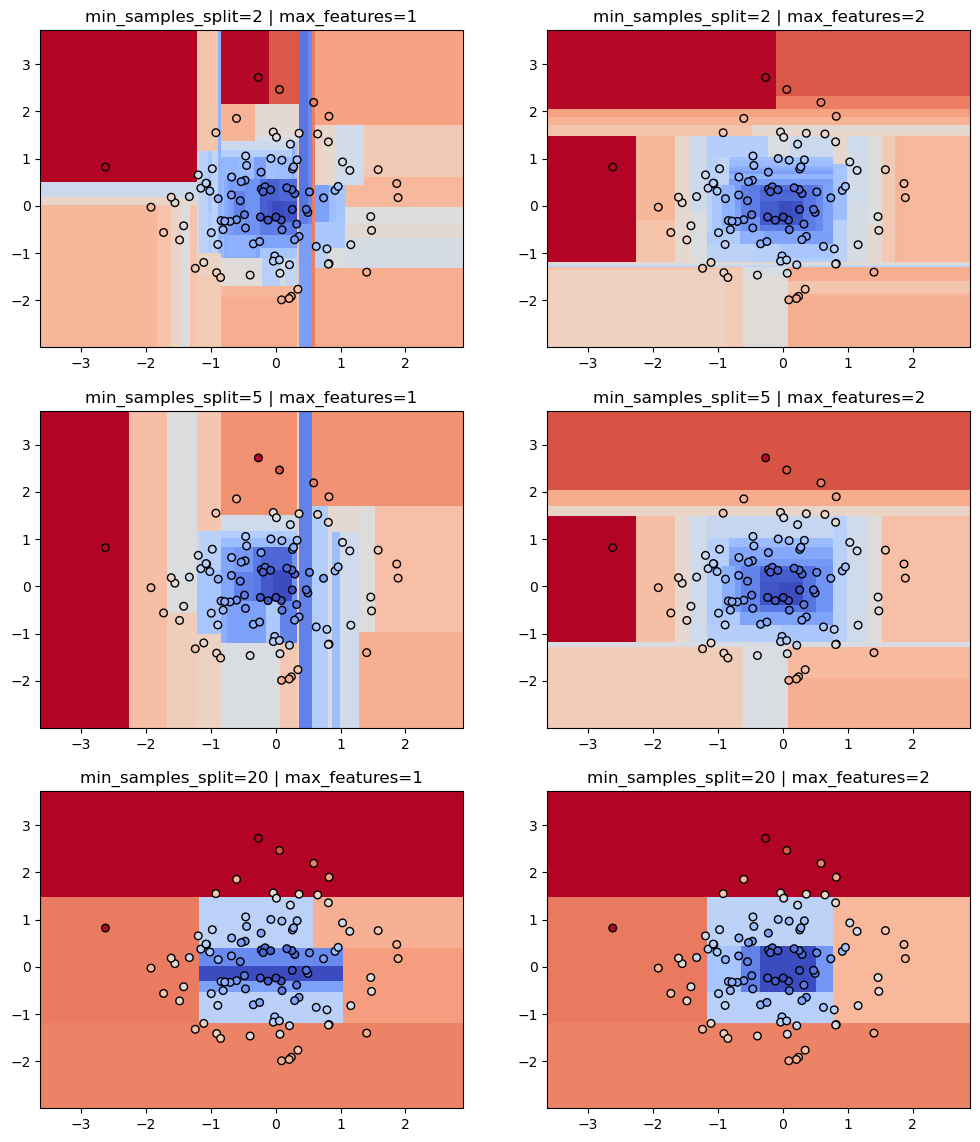

In [ ]:
plt.figure(figsize=(14, 14))

for i, min_samples_split in enumerate(pass):
    for j, max_features in enumerate(pass):
        pass

## Decision trees instability

With the slightest changes in the training sample, the final classifier can significantly change. Let's see how the structure of the tree will change on different 90% subsamples.

In [ ]:
data_x = X_scaled[:, (0,5)]
data_y = ytr.values

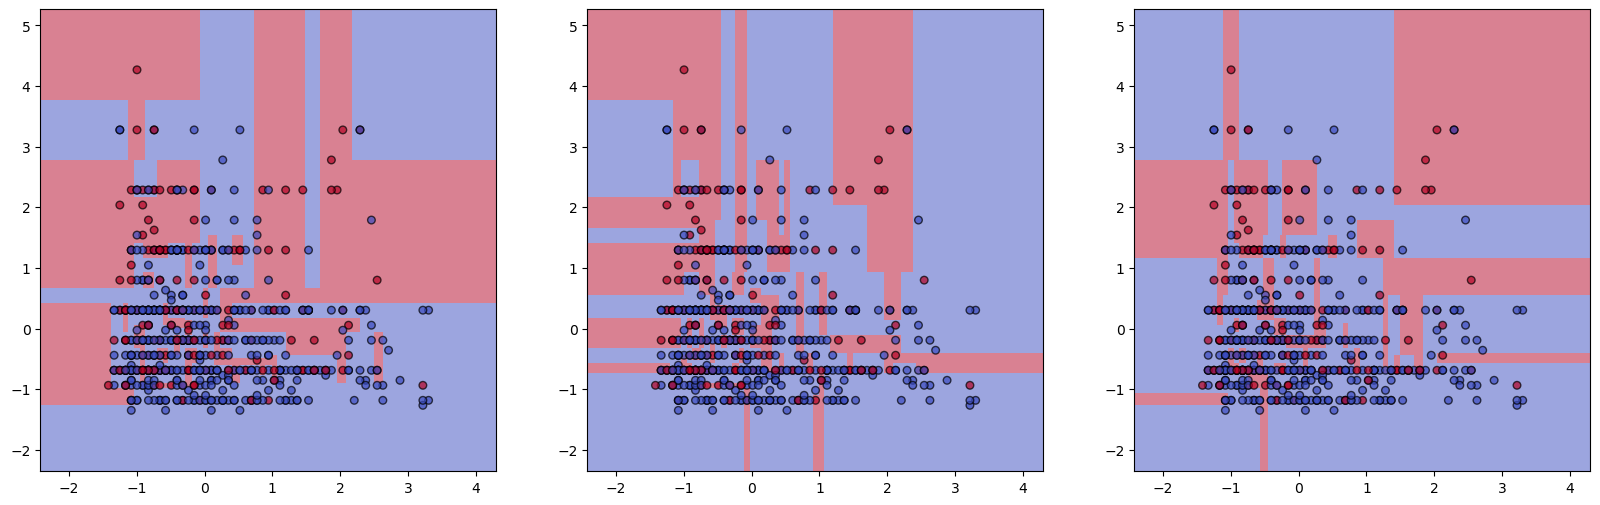

In [ ]:
plt.figure(figsize=(20, 6))
for i in range(3):
    clf = DecisionTreeClassifier(random_state=42)

    idx = np.random.randint(data_x.shape[0], size=int(data_x.shape[0] * 0.9))
    clf.fit(data_x[idx], data_y[idx])
    xx, yy = get_grid(data_x)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='coolwarm', alpha=0.5)
    plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='coolwarm', alpha=0.7, edgecolor='k')

## HP tuning

#### Task: select best decision tree hyperparameters using your favourite HP tuning technique. What HP will you tune?

This is just an example of tuning max_features, max_depth, min_samples_leaf using GridSearchCV

In [ ]:
gs = GridSearchCV(...)
gs.fit(...)

In [ ]:
cv_grid = pd.DataFrame(gs.cv_results_['params'])

cv_grid['mean_test_score'] = gs.cv_results_['mean_test_score']

cv_grid.tail()

,max_depth,max_features,min_samples_leaf,mean_test_score
79,50,log2,32,0.594679
80,50,sqrt,1,0.603385
81,50,sqrt,4,0.614964
82,50,sqrt,8,0.666687
83,50,sqrt,32,0.594679


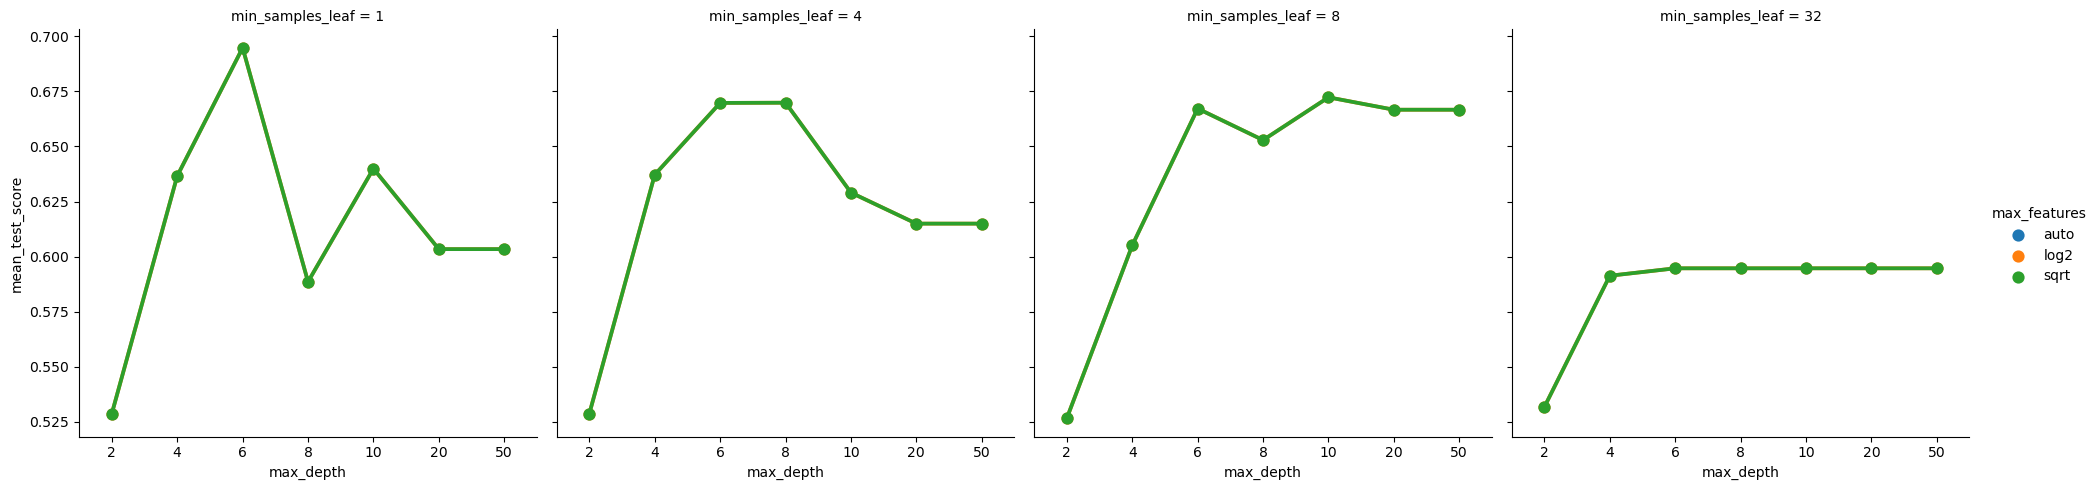

In [ ]:
sns.catplot(x='max_depth', y='mean_test_score', data=cv_grid,
            col='min_samples_leaf', hue='max_features',
            kind='point')

#### Task: suppose why, when the min_samples_leaf parameter is increased, the tree stops overfitting when max_depth grows?

# Oblivious Decision Tree

![](https://qph.fs.quoracdn.net/main-qimg-5274e48e1766230e22e3cdd7e83019ce)

* One predicate of the form $[x_j < t]$ for each level.
* Weaker than ordinary trees, prevent overfitting.
* Much more efficient than usual random trees.
* You only need to store a sequence of thresholds and feature numbers.
* Each leaf could be assigned with a unique sequence of 0 and 1, which corresponds to a number (index). You can store the leaves as an array and access them by index.

![](https://qph.fs.quoracdn.net/main-qimg-c8457d5d20273f0368f801d6593aa667)

# Blending

You can read about ensembling here: https://dyakonov.org/2017/03/10/cтекинг-stacking-и-блендинг-blending/

#### Task:

- set up GridSearchCV as usual, but with estimator = VotingClassifier and param_grid = grid with weights
- grid should look something like ... 'weights': [[i, 1 - i] for i in np.arange(0,1.1,0.1)] ...
- use german_credit_data_test.csv to analyse the resuts
- try to use scaled and unscaled data

In [ ]:
# find optimal structure of base algorithms (tune HP)

kNN_model = KNeighborsClassifier(...)

LR_model = LogisticRegression(...)

In [ ]:
# pass our models to VotingClassifier 
vc = VotingClassifier([('kNN', kNN_model), ('LR', LR_model)], voting='soft')

# search for optimal alpha_1, alpha_2 on cross-validation
# 'weights': [[i, 1 - i] for i in np.arange(0,1.1,0.1)]
grid = GridSearchCV(...)

grid.fit(...)

In [ ]:
# Best alphas
# 

In [ ]:
# best ROC_AUC
# 

In [ ]:
# example results of blending some logreg and knn
# you may have different results

print("Score for kNN = {:.3f}".format(GS_kNN.best_score_))
print("Score for LogReg = {:.3f}".format(GS_LR.best_score_))
print("Score for ensemble of kNN and LogReg = {:.3f}".format(grid.best_score_))

Score for kNN = 0.732
Score for LogReg = 0.763
Score for ensemble of kNN and LogReg = 0.771
